# Intro
This notebook calculates the exclusion and discovery sensitivity of nEXO assuming we operate as a counting experiment. Specifically, we calculate the background index vs sensitivity which will serve as look-up-table to determine the background index that an counting experiment would have to have to match the sensitivity of our likelihood analysis.

# Packages and Setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import Counting

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.family'] = 'serif'

Welcome to JupyROOT 6.22/02


# Parameters

In [3]:
XenonMass = [500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 3281.0] # in kg 
BkgIndexRaw = [0.00012, 0.000207, 0.000295, 0.000448, 0.00066, 0.00104, 0.00132] # in cts/FWHM/kg/yr 

BkgIndex = {}
for ii,Mass in enumerate(XenonMass): 
    BkgIndex[Mass] = BkgIndexRaw[ii]
                       
Livetime = np.append(np.arange(0.1,1,0.1), np.arange(1,10.1,0.5)) # in yrs

We are only interested in evaluationg the counting experiment sensitivity and discovery potential for the fiducial mass of 3281 kg and after 10 years of livetime. 

In [4]:
XenonMass = [3281] # in kg
Livetime = [10.0] # in yrs

The signal efficiency is gotten from this [Jupyter Notebook](https://github.com/nEXO-collaboration/sensitivity/blob/sensitivity2020/work/SensitivityPaper2020_scripts/CountingExperiment/FindROISignalEfficiency.ipynb) looking at the fraction of events in the ROI passing all the analysis cuts. 

In [5]:
Bb0nEfficiency = 0.5756

# Calculations
We want to scan over the background index to get an equivalent counting experiment discovery and exclusion sensitivity to compare with our likelihood fit analysis.

In [6]:
Sigma = {}
Scaling = np.arange(1,101,0.5)
for scale in Scaling:
    Sigma[scale] = Counting.RunCountingExperiment(XenonMass=XenonMass, Livetime=Livetime, BkgIndex=BkgIndex, Scaling=scale)

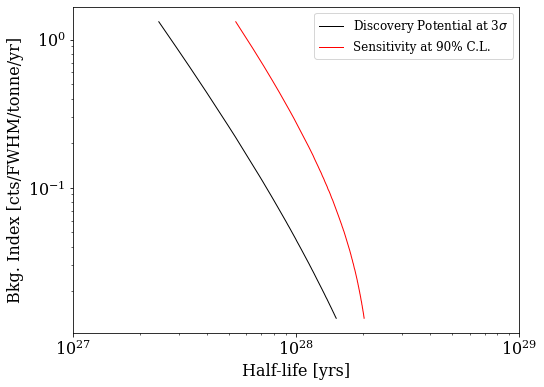

In [7]:
fig = plt.figure(figsize=(8,6))

plt.plot( [Sigma[scale]['Discovery']['Asimov']['Half-life'][0][0] for scale in Scaling], BkgIndex[3281]/Scaling*1000.0, color='k', label='Discovery Potential at 3$\sigma$ ')
plt.plot( [Sigma[scale]['Sensitivity']['Asimov']['Half-life'][0][0] for scale in Scaling], BkgIndex[3281]/Scaling*1000.0, color='r', label='Sensitivity at 90% C.L.')
    
plt.xlabel('Half-life [yrs]')
plt.ylabel('Bkg. Index [cts/FWHM/tonne/yr]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e27,1e29)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('bkg_vs_sens.pdf', bbox_inches='tight')
plt.show()